In [181]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [182]:
df = pd.read_csv('data/processed.csv', index_col='Date')
features = ['Price_Range_Pct','MA_5', 'MA_20', 'MACD', 'RSI', 'OBV', 'ATR', 'fng', 'Upper_BB', 'Middle_BB', 'Lower_BB']
X = df[features].dropna()
y = df['Close'].loc[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
    
# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [183]:
# # Train SVM model
# svm_model = SVR(kernel='rbf')
# svm_model.fit(X_train_scaled, y_train)
# print(svm_model.score(X_test_scaled, y_test))

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_
print(best_model.score(X_test_scaled, y_test))

0.8679013150023785


In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = best_model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 3.8392854364234643, RMSE: 6.823012942906097


In [186]:
predictions = best_model.predict(X_test_scaled);

preds = pd.DataFrame(y_test)
preds['Prediction'] = predictions

print(preds)

                 Close  Prediction
Date                              
2023-09-21  173.929993  174.955019
2023-09-22  174.789993  175.767000
2023-09-25  176.080002  177.077938
2023-09-26  171.960007  172.620604
2023-09-27  170.429993  170.886038
...                ...         ...
2024-08-28  226.490005  212.212379
2024-08-29  229.789993  214.168122
2024-08-30  229.000000  214.074085
2024-09-03  222.770004  208.231665
2024-09-04  220.850006  207.352261

[240 rows x 2 columns]


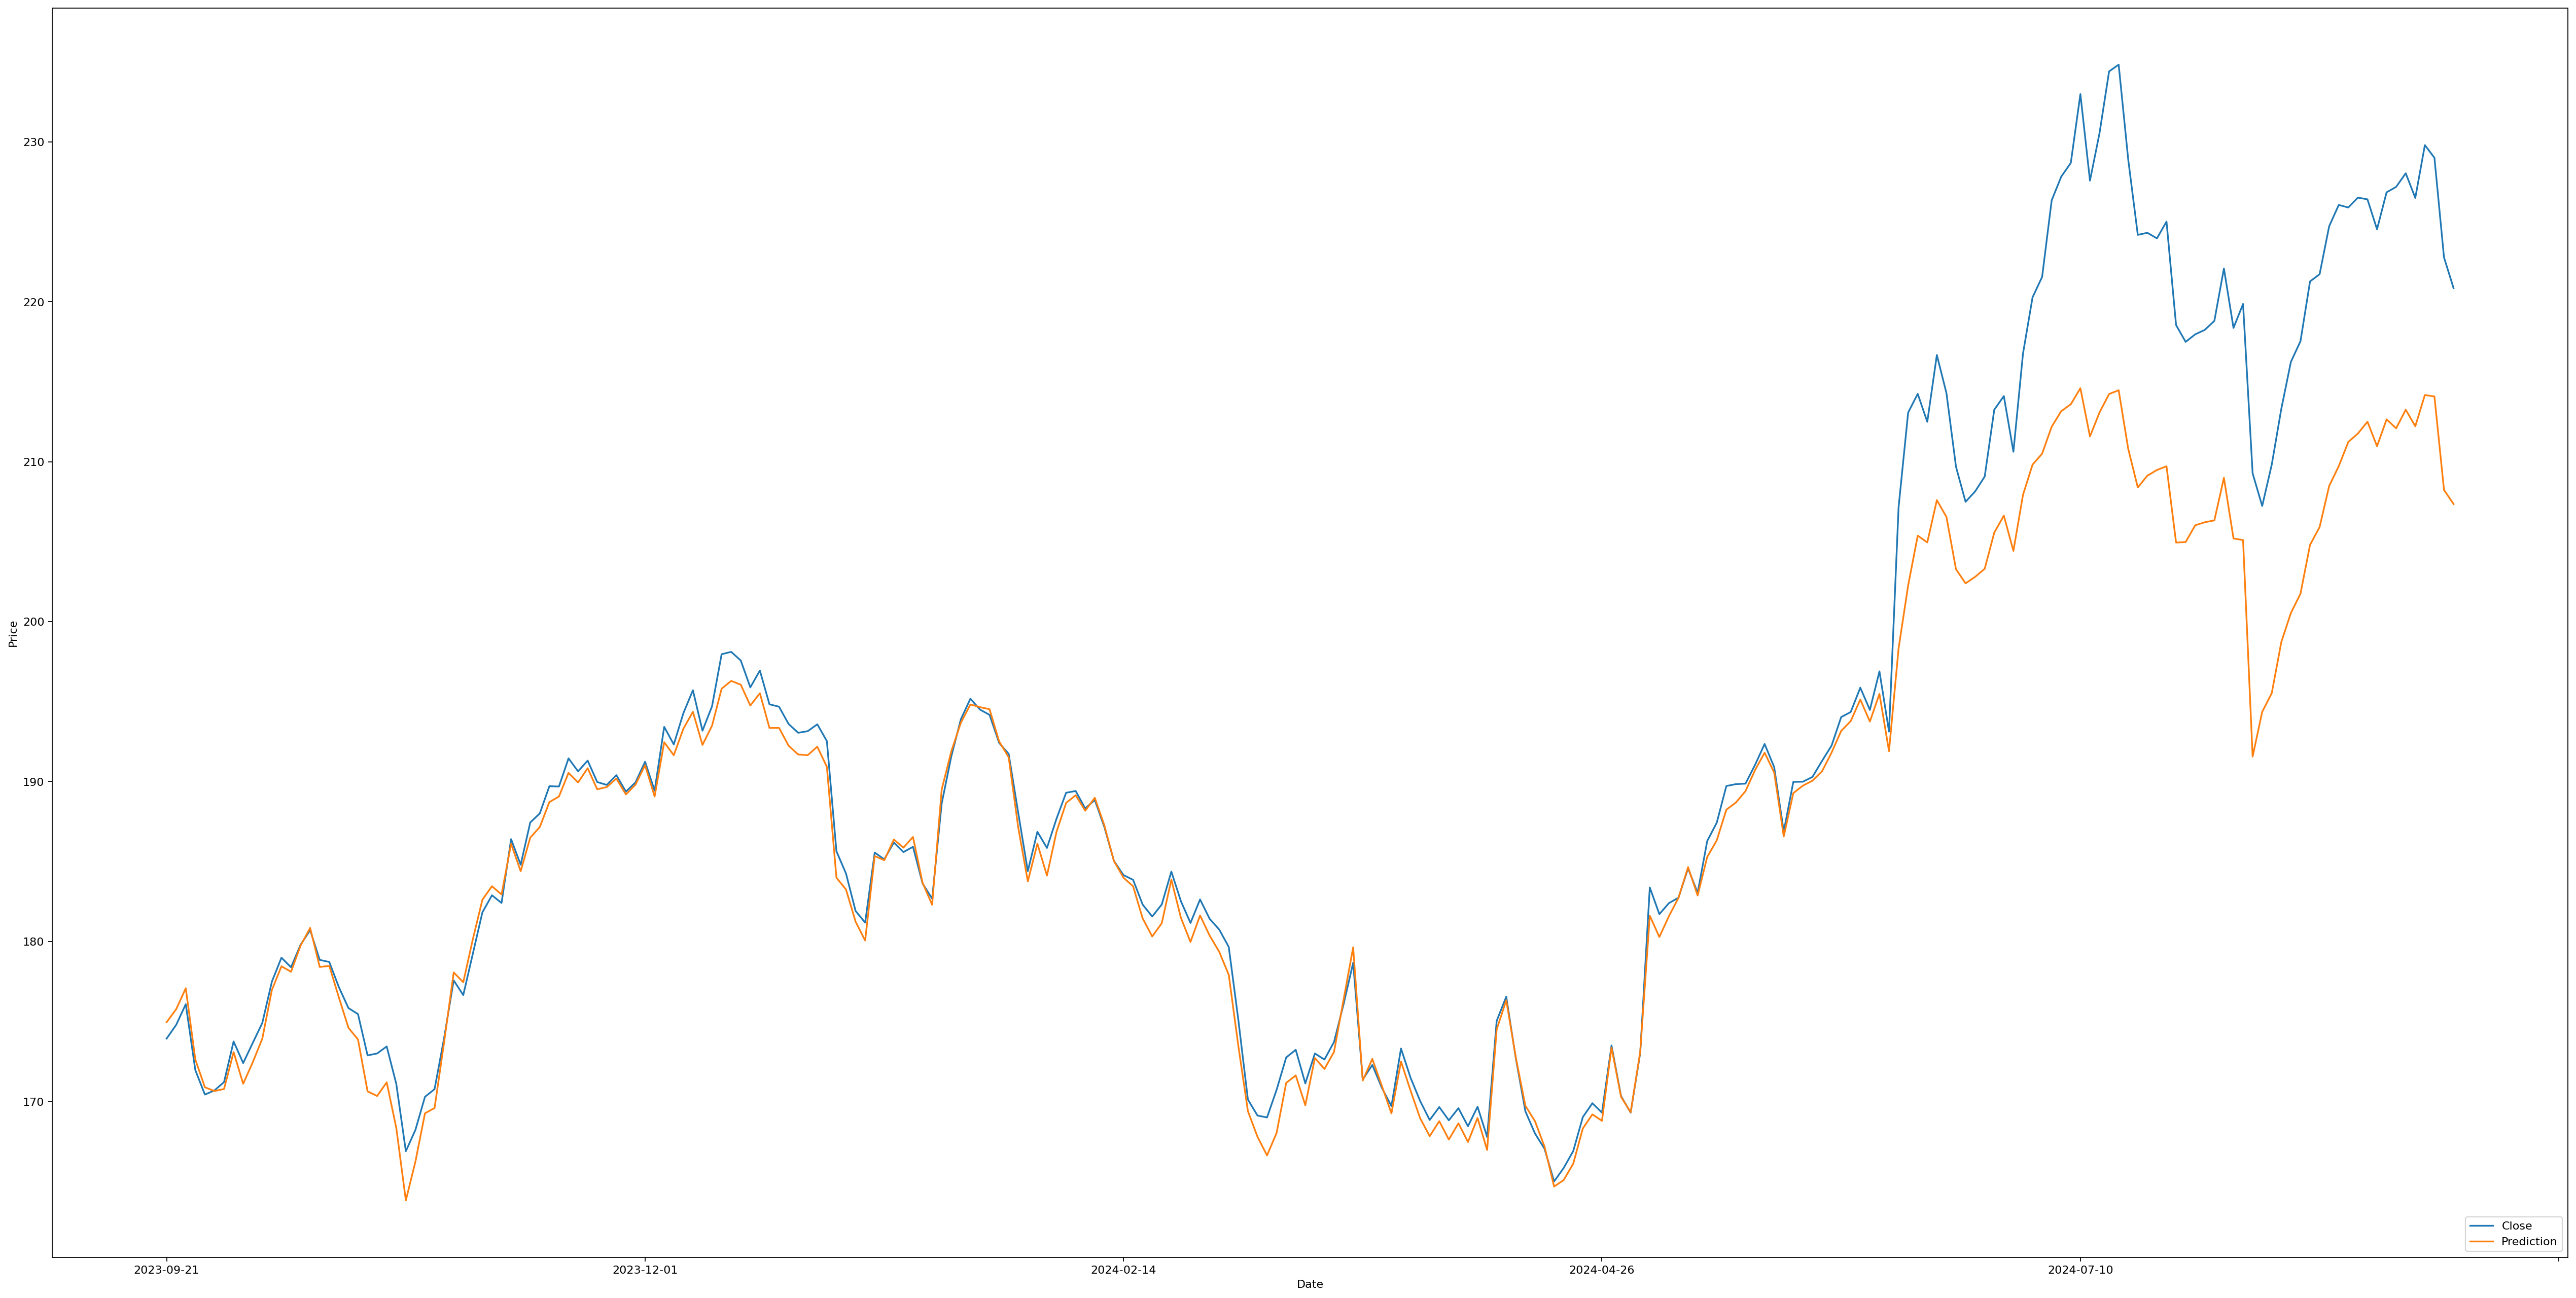

In [187]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
preds['Close'].plot()
preds['Prediction'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()